In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from itertools import product

pd.set_option('display.max_rows', 15)
np.random.seed(5)


np.random.seed(5)

sns.set()

In [2]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf


In [3]:
from google.colab import drive
drive.mount('/content/drive')
bowler = pd.read_csv('/content/drive/MyDrive/Diss/Code/CSV/bowlers_for_clustering.csv')

Mounted at /content/drive


In [4]:
bowler_for_clustering = bowler.copy().drop(['name','country','prelim_metric','pre-rank'],axis=1)
bowler_for_clustering

,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
0,19.88,17.8,6.67,22.377,1.253,0.063,1.056,24.905
1,24.58,17.9,8.19,22.167,1.233,0.022,1.159,30.322
2,13.00,12.7,6.12,22.741,1.787,0.098,1.509,23.246
3,20.79,16.8,7.42,21.651,1.289,0.036,1.162,26.807
4,24.44,22.1,6.63,22.342,1.010,0.031,0.915,24.701
...,...,...,...,...,...,...,...,...
1080,66.00,53.0,7.47,12.750,0.250,0.000,0.250,16.500
1081,62.00,42.0,8.85,10.500,0.250,0.000,0.250,15.500
1082,51.00,42.0,7.28,8.400,0.200,0.000,0.200,10.200
1083,75.00,60.0,7.50,15.000,0.250,0.000,0.250,18.750


In [5]:
bowler_for_clustering_scaled = bowler_for_clustering.copy()
bowler_for_clustering_scaled['average'] = ((np.max(bowler_for_clustering_scaled['average'])) - bowler_for_clustering_scaled['average']) / (np.max(bowler_for_clustering_scaled['average']) - np.min(bowler_for_clustering_scaled['average']))
bowler_for_clustering_scaled['strike_rate'] = ((np.max(bowler_for_clustering_scaled['strike_rate'])) - bowler_for_clustering_scaled['strike_rate']) / (np.max(bowler_for_clustering_scaled['strike_rate']) - np.min(bowler_for_clustering_scaled['strike_rate']))
bowler_for_clustering_scaled['economy'] = ((np.max(bowler_for_clustering_scaled['economy'])) - bowler_for_clustering_scaled['economy']) / (np.max(bowler_for_clustering_scaled['economy']) - np.min(bowler_for_clustering_scaled['economy']))
bowler_for_clustering_scaled['runs_index'] = ((np.max(bowler_for_clustering_scaled['runs_index'])) - bowler_for_clustering_scaled['runs_index']) / (np.max(bowler_for_clustering_scaled['runs_index']) - np.min(bowler_for_clustering_scaled['runs_index']))


bowler_for_clustering_scaled['balls_bolwed_per_innings'] = (bowler_for_clustering_scaled['balls_bolwed_per_innings'] - np.min(bowler_for_clustering_scaled['balls_bolwed_per_innings'])) / (np.max(bowler_for_clustering_scaled['balls_bolwed_per_innings']) - np.min(bowler_for_clustering_scaled['balls_bolwed_per_innings']))
bowler_for_clustering_scaled['wicket_index'] = (bowler_for_clustering_scaled['wicket_index'] - np.min(bowler_for_clustering_scaled['wicket_index'])) / (np.max(bowler_for_clustering_scaled['wicket_index']) - np.min(bowler_for_clustering_scaled['wicket_index']))
bowler_for_clustering_scaled['big_impact_index'] = (bowler_for_clustering_scaled['big_impact_index'] - np.min(bowler_for_clustering_scaled['big_impact_index'])) / (np.max(bowler_for_clustering_scaled['big_impact_index']) - np.min(bowler_for_clustering_scaled['big_impact_index']))
bowler_for_clustering_scaled['short_impact_index'] = (bowler_for_clustering_scaled['short_impact_index'] - np.min(bowler_for_clustering_scaled['short_impact_index'])) / (np.max(bowler_for_clustering_scaled['short_impact_index']) - np.min(bowler_for_clustering_scaled['short_impact_index']))


In [6]:
bowler_for_clustering_scaled

,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
0,0.927337,0.913447,0.686481,0.909833,0.480417,0.1575,0.469333,0.496182
1,0.901717,0.912674,0.540748,0.898167,0.472083,0.0550,0.515111,0.337093
2,0.964841,0.952859,0.739214,0.930056,0.702917,0.2450,0.670667,0.544905
3,0.922377,0.921175,0.614573,0.869500,0.495417,0.0900,0.516444,0.440323
4,0.902480,0.880216,0.690316,0.907889,0.379167,0.0775,0.406667,0.502173
...,...,...,...,...,...,...,...,...
1080,0.675933,0.641422,0.609779,0.375000,0.062500,0.0000,0.111111,0.743025
1081,0.697738,0.726430,0.477469,0.250000,0.062500,0.0000,0.111111,0.772394
1082,0.757700,0.726430,0.627996,0.133333,0.041667,0.0000,0.088889,0.928047
1083,0.626874,0.587326,0.606903,0.500000,0.062500,0.0000,0.111111,0.676946


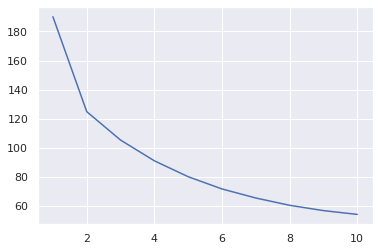

In [7]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(bowler_for_clustering_scaled)
  wcss.append(model.inertia_)
plt.plot(np.arange(1,11,1),wcss)
plt.show()

In [8]:
kmodel =  KMeans(n_clusters=4)
ypred_kmeans = kmodel.fit_predict(bowler_for_clustering_scaled)

In [9]:
ypred_kmeans

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [10]:
results = bowler
results['kmeans'] = ypred_kmeans

In [11]:
X_train, X_test, y_train, y_test = train_test_split(results.drop('kmeans',axis=1), results['kmeans'], test_size=0.2, random_state=42)
X_train.drop(['name','country','prelim_metric','pre-rank'],axis=1,inplace=True)
X_test.drop(['name','country','prelim_metric','pre-rank'],axis=1,inplace=True)

In [12]:

X_train['average'] = ((np.max(X_train['average'])) - X_train['average']) / (np.max(X_train['average']) - np.min(X_train['average']))
X_train['strike_rate'] = ((np.max(X_train['strike_rate'])) - X_train['strike_rate']) / (np.max(X_train['strike_rate']) - np.min(X_train['strike_rate']))
X_train['economy'] = ((np.max(X_train['economy'])) - X_train['economy']) / (np.max(X_train['economy']) - np.min(X_train['economy']))
X_train['runs_index'] = ((np.max(X_train['runs_index'])) - X_train['runs_index']) / (np.max(X_train['runs_index']) - np.min(X_train['runs_index']))


X_train['balls_bolwed_per_innings'] = (X_train['balls_bolwed_per_innings'] - np.min(X_train['balls_bolwed_per_innings'])) / (np.max(X_train['balls_bolwed_per_innings']) - np.min(X_train['balls_bolwed_per_innings']))
X_train['wicket_index'] = (X_train['wicket_index'] - np.min(X_train['wicket_index'])) / (np.max(X_train['wicket_index']) - np.min(X_train['wicket_index']))
X_train['big_impact_index'] = (X_train['big_impact_index'] - np.min(X_train['big_impact_index'])) / (np.max(X_train['big_impact_index']) - np.min(X_train['big_impact_index']))
X_train['short_impact_index'] = (X_train['short_impact_index'] - np.min(X_train['short_impact_index'])) / (np.max(X_train['short_impact_index']) - np.min(X_train['short_impact_index']))


In [13]:
X_train

,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
522,0.966084,0.973520,0.640460,0.753333,0.790698,0.0000,0.790698,0.534508
851,0.801475,0.883956,0.220518,0.291667,0.186047,0.0000,0.186047,0.592511
215,0.881922,0.887850,0.581975,0.293500,0.191628,0.0000,0.191628,0.798532
628,0.964391,0.959502,0.725791,0.500000,0.496279,0.0000,0.496279,0.767489
593,0.764610,0.788941,0.498562,0.766667,0.219070,0.0000,0.219070,0.388517
...,...,...,...,...,...,...,...,...
330,0.887329,0.880062,0.637584,0.790222,0.363721,0.0000,0.363721,0.514126
466,0.991808,0.970405,0.902205,0.933333,0.883721,0.5000,0.534884,0.734214
121,0.942654,0.942368,0.658677,0.619056,0.485116,0.3575,0.224651,0.643377
1044,0.693610,0.591900,0.721956,0.500000,0.069767,0.0000,0.069767,0.765051


In [14]:
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(6, input_shape=(8,), activation='relu'))
model.add(Dense(6, input_shape=(8,), activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
87/87 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2915
Epoch 2/200
87/87 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2915
Epoch 3/200
87/87 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2915
Epoch 4/200
87/87 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2915
Epoch 5/200
87/87 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2915
Epoch 6/200
87/87 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2915
Epoch 7/200
87/87 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2915
Epoch 8/200
87/87 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2915
Epoch 9/200
87/87 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2915
Epoch 10/200
87/87 [==============================] - 0s 2ms/step - loss:

In [17]:
accuracy = model.evaluate(X_train, y_train, verbose=0)

In [18]:
accuracy

[0.0, 0.2914746403694153]